# Домашнее задание "Визуализация данных в Python"

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1) Линейная диаграмма - по оси Х - позиция в экономическом рейтинге стран, по оси Y - индекс счастья населения. Диаграмма наглядно иллюстрирует идею, что с падением уровня экономического благополучия страны падакт и индекс удовлетворенностью жизнью у населения.

In [87]:
df = pd.read_csv('https://github.com/belotelovp/netology_pyda/blob/master/WorldHappiness2018_Data.csv?raw=true')
df.head()

,Rank,Country,Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,Residual
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.192,0.393,2.988
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.723
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.779
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.564
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.675


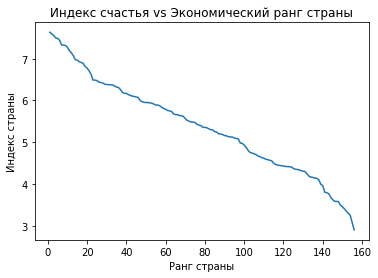

In [88]:
plt.plot(rank, score)
plt.title('Индекс счастья vs Экономический ранг страны')
plt.xlabel('Ранг страны')
plt.ylabel('Индекс страны')
plt.show()

2) Диаграмма рассеяния - по оси Х - значение валового внутреннего продукта на душу населения, по оси Y - индекс счастья населения. Диаграмма иллюстрирует тренд, что с ростом ВВП растет и индекс удовлетворенностью жизнью у населения.

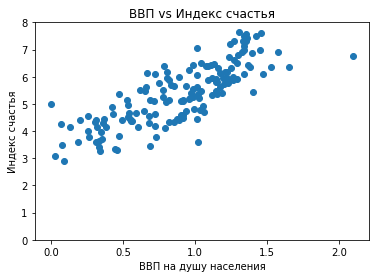

In [91]:
gdp = df['GDP_Per_Capita']
plt.scatter(gdp, score)
plt.title('ВВП vs Индекс счастья')
plt.xlabel('ВВП на душу населения')
plt.ylabel('Индекс счастья')
plt.ylim(0,8)
plt.show()

3) Гистограмма - по оси Х значения индекса счастья, а по оси Y - количество стран, которым соотвествет это значение. Видно, что это нормальное распределение, что может говорить о достоверности проведенного исследования.

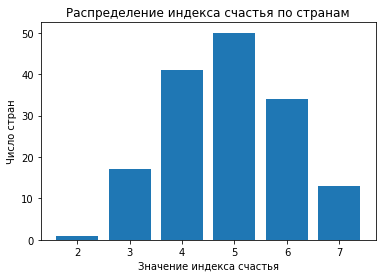

In [93]:
roundedHappinessScore = score.apply(int)
count = roundedHappinessScore.value_counts()
hapScore = count.index
plt.bar(hapScore, count)
plt.title('Распределение индекса счастья по странам')
plt.xlabel('Значение индекса счастья')
plt.ylabel('Число стран')
plt.show()

4) Круговая диаграмма. Вручную взяты переменные - названия российских городов и количество точек кафе, которые находятся в этих городах. Выделен отступом сектор с городом-лидером по количеству заведений. 

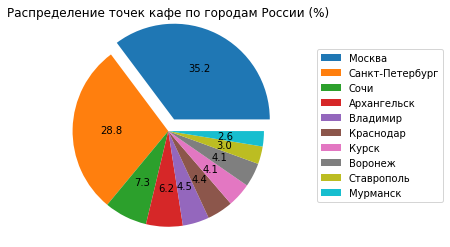

In [72]:
data_names = ['Москва', 'Санкт-Петербург', 'Сочи', 'Архангельск',
              'Владимир', 'Краснодар', 'Курск', 'Воронеж',
              'Ставрополь', 'Мурманск']
data_values = [1076, 879, 222, 189, 137, 134, 124, 124, 91, 79]

plt.title('Распределение точек кафе по городам России (%)')

xs = range(len(data_names))

plt.pie(
    data_values, autopct='%.1f', radius = 1.1,
    explode = [0.15] + [0 for _ in range(len(data_names) - 1)] )
plt.legend(
    bbox_to_anchor = (1.16, 0.15, 0.25, 0.25),
    loc = 'lower left', labels = data_names )
plt.show()


5) Двумерная гистограмма в Seaborn. Есть набор X, Y точек данных, которые представляются в виде тепловой карты, где зоны с более высокой частотой х, у будут темнее. Диаграмма совмещенная с графиками распределения по осям.

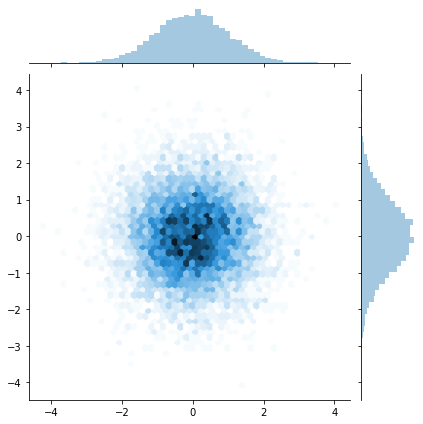

In [74]:
import numpy as np

x = np.random.randn(8873)
y = np.random.randn(8873)

sns.jointplot(x=x, y=y, kind='hex')
plt.show()